## Imports

In [6]:
import numpy as np
import polycg as pcg

vls = pcg.gen_params('cgna+','ATCG')

Generating partial stiffness matrix with
block_size:   3
overlap_size: 2
tail_size:    20
Generating stiffness from bps 0 to 3 (3 in total).
convert to sparse


### Generate parameters and calculate bend angles

In [14]:
# generate random sequence
disc_len = 10
nbp = 101
model = 'cgna+'
angles = True
degrees = True


seq = ''.join(['atcg'[np.random.randint(4)] for i in range(nbp)])
crv = pcg.dnacurv(seq,disc_len,model=model,angles=angles,degrees=degrees)

Generating partial stiffness matrix with
block_size:   100
overlap_size: 20
tail_size:    20
Generating stiffness from bps 0 to 100 (100 in total).
convert to sparse


### Transform from Cayley to Euler parameters

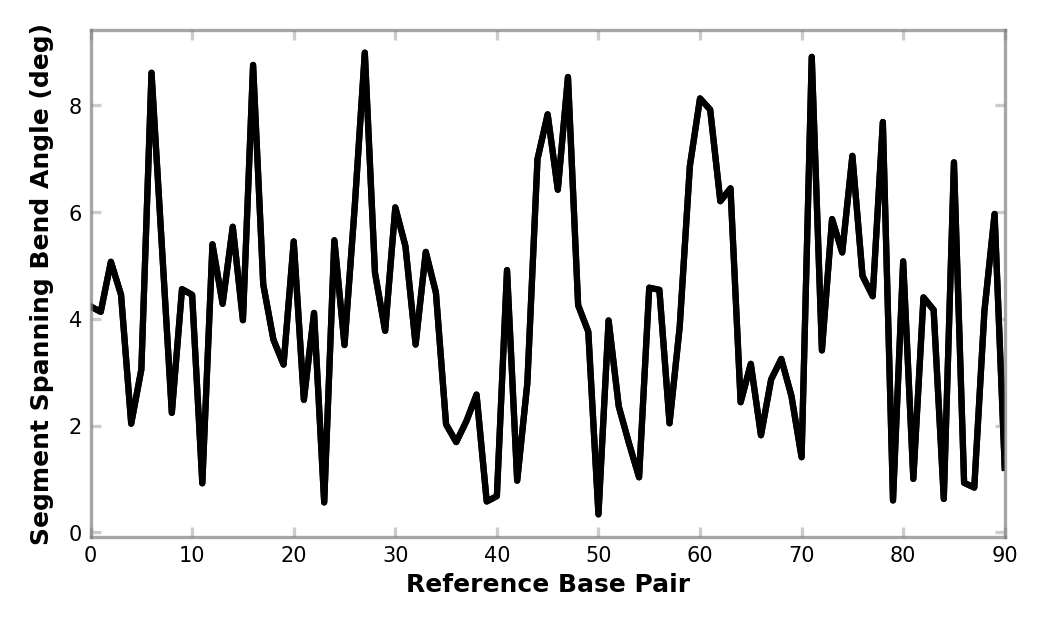

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# Leave text as text in the SVG
mpl.rcParams['svg.fonttype'] = 'none'
# (Optional) choose a font you have installed:
mpl.rcParams['font.family'] = 'DejaVu Sans'

def cm_to_inch(cm: float) -> float:
    return cm/2.54

def set_xlim_to_data(ax):
    ax.set_xlim(np.nanmin([np.nanmin(l.get_xdata()) for l in ax.get_lines()] + [np.nanmin(c.get_offsets()[:,0]) for c in ax.collections if c.get_offsets().size]), 
            np.nanmax([np.nanmax(l.get_xdata()) for l in ax.get_lines()] + [np.nanmax(c.get_offsets()[:,0]) for c in ax.collections if c.get_offsets().size]))



##################################################
# general Figure Setup
axlinewidth = 0.8
axcolor     ='grey'
axalpha     = 0.7
axtick_major_width  = 0.8
axtick_major_length = 2.4
axtick_minor_width  = 0.4
axtick_minor_length = 1.6

tick_pad        = 2
tick_labelsize  = 5
label_fontsize  = 6
legend_fontsize = 6

panel_label_fontsize = 8
label_fontweight= 'bold'
panel_label_fontweight= 'bold'

fig_width = 8.6
fig_height = 5

##################################################
# Main

fig = plt.figure(figsize=(cm_to_inch(fig_width), cm_to_inch(fig_height)), dpi=300,facecolor='w',edgecolor='k') 
axes = []
axes.append(plt.subplot2grid(shape=(1, 1), loc=(0, 0), colspan=1,rowspan=1))
ax1 = axes[0]

ax1.plot(np.arange(len(crv)),crv,color='black')

scatter_marker = 'o'
scatter_linewidth = 0.8
scatter_alpha = 0.8
scatter_size = 20
scatter_color = 'blue'
ax1.scatter(np.arange(len(crv)),crv,color=scatter_color,s=scatter_size,edgecolor='black',linewidth=scatter_linewidth,marker=scatter_marker,alpha=scatter_alpha))

set_xlim_to_data(ax1)

xlabel_pos = [0.5,-.07]
ylabel_pos = [-0.04,0.5]

ax1.set_xlabel('Reference Base Pair',fontsize=label_fontsize,fontweight=label_fontweight)
ax1.xaxis.set_label_coords(*xlabel_pos)

ax1.set_ylabel(r'Segment Spanning Bend Angle (deg)',fontsize=label_fontsize,fontweight=label_fontweight)
ax1.yaxis.set_label_coords(*ylabel_pos)


for ax in axes:
    
    ###############################
    # set major and minor ticks
    # ax.tick_params(axis="both",which='major',direction="in",width=axtick_major_width,length=axtick_major_length,labelsize=tick_labelsize,pad=tick_pad,)
    # ax.tick_params(axis='both',which='minor',direction="in",width=axtick_minor_width,length=axtick_minor_length)
    ax.tick_params(axis="both",which='major',direction="in",width=axtick_major_width,length=axtick_major_length,labelsize=tick_labelsize,pad=tick_pad,color='#cccccc')
    ax.tick_params(axis='both',which='minor',direction="in",width=axtick_minor_width,length=axtick_minor_length,color='#cccccc')

    ###############################
    ax.xaxis.set_ticks_position('both')
    # set ticks right and top
    ax.yaxis.set_ticks_position('both')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(axlinewidth)
        ax.spines[axis].set_color(axcolor)
        ax.spines[axis].set_alpha(axalpha)

##############################################
# Setup subpanels

plt.subplots_adjust(
    left=0.08,
    right=0.98,
    bottom=0.11,
    top=0.97,
    wspace=0.25,
    hspace=0.25
    )


##################################################
# Save Figure
savefn = 'dnacurvature'

fig.savefig(savefn+'.pdf',dpi=300,transparent=True)
fig.savefig(savefn+'.svg',dpi=300,transparent=True)
fig.savefig(savefn+'.png',dpi=300,transparent=False)

plt.show()



### Coarse-Grain ground state only

In [5]:
composite_size = 10
cg_gs = polycg.cg_groundstate(gs_euler,composite_size=composite_size)
print(cg_gs.shape)

(10, 6)


### Direct Generation
The method `gen_params` can directly generate coarse-grained parameters if if the argument `composite_size` is specified

In [6]:
# generate random sequence
nbp = 401
seq = ''.join(['atcg'[np.random.randint(4)] for i in range(nbp)])
composite_size = 10

params = polycg.gen_params('cgnaplus',seq,composite_size=composite_size)
cg_gs = params['cg_gs']
cg_stiff = params['cg_stiff']

print(cg_gs.shape)
print(cg_stiff.shape)

Generating partial stiffness matrix with
block_size:   120
overlap_size: 20
tail_size:    20
Generating stiffness from bps 0 to 120 (400 in total).
Generating stiffness from bps 100 to 220 (400 in total).
Generating stiffness from bps 200 to 400 (400 in total).
convert to sparse
Coarse-graining from bps 0 to 120 (400 in total).
Coarse-graining from bps 100 to 220 (400 in total).
Coarse-graining from bps 200 to 400 (400 in total).
(40, 6)
(240, 240)
